In [1]:
import os
import matplotlib.pyplot as plt

# Load standard libs
import sys
import pandas as pd

# Load custom code
sys.path.append(os.path.join(os.getcwd(), "..", "neuroencoders"))
from utils.global_classes import Params, Project, save_project_to_pickle
from utils.global_classes import DataHelper as DataHelperClass
from importData import rawdata_parser
from resultAnalysis import print_results
from transformData.linearizer import UMazeLinearizer
from utils import management, MOBS_Functions
from fullEncoder import an_network as Training
from importData.juliaData.julia_data_parser import julia_spike_filter
from openEphysExport.generate_json import generate_json
import numpy as np
from importlib import reload
from importData import epochs_management as ep

2025-08-19 13:27:19.700331: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-19 13:27:19.700383: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-19 13:27:19.701596: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
nameExp = "current_LogLoss_Transformer_Dense"
nameExp_Transformer = "current_LogLoss_Transformer_Dense_Transformer"
nameExp_LSTM = "current_LogLoss_Transformer_Dense_LSTM"

In [4]:
jsonPath = None
windowSizeMS = [108, 252]
mode = "ann"
target = "pos"
phase = "pre"
nEpochs = 200
mouse = "1199"
manipe = "PAG"

In [5]:
from utils.MOBS_Functions import path_for_experiments_df


Dir = path_for_experiments_df("Sub", nameExp)
Dir_Transformer = path_for_experiments_df("Sub", nameExp_Transformer)
Dir_LSTM = path_for_experiments_df("Sub", nameExp_LSTM)

## mobs_function

In [6]:
%matplotlib qt

In [7]:
mice_nb = [
    "M1199_PAG",
    "M994_PAG",
    "M1239_MFB",
    "M1230_Novel",
    "M1230_Known",
    "M1162_MFB",
]
mice_names = ["1199", "994", "1239", "1230", "1230", "1162"]
mice_manipes = ["PAG", "PAG", "MFB", "Novel", "Known", "MFB"]

In [8]:
Dir_LSTM

path       name       manipe  \
0   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1168       SubMFB   
1   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1186       SubPAG   
2   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1336       SubMFB   
3   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1336       SubMFB   
4   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199       SubPAG   
5   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199  SubReversal   
6   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1117       SubMFB   
7   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1281       SubMFB   
8   /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1182       SubPAG   
9   /media/mickey/DataTheotime210/DimaERC2/neuroen...   Mouse994       SubPAG   
10  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1239       SubMFB   
11  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1162       SubMFB   
12  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1199       SubMFB   
13  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1239       SubPAG   
14  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1162       SubPAG   
15  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1230     SubKnown   
16  /media/mickey/DataTheotime210/DimaERC2/neuroen...  Mouse1230     SubNovel   

   CorrecAmpli Session delay  date Treatment  \
0         None    None  None  None      None   
1         None    None  None  None      None   
2         None    None  None  None      None   
3         None    None  None  None      None   
4         None    None  None  None      None   
5         None    None  None  None      None   
6         None    None  None  None      None   
7         None    None  None  None      None   
8         None    None  None  None      None   
9         None    None  None  None      None   
10        None    None  None  None      None   
11        None    None  None  None      None   
12        None    None  None  None      None   
13        None    None  None  None      None   
14        None    None  None  None      None   
15        None    None  None  None      None   
16        None    None  None  None      None   

                                            expe_info  \
0   [[[[[1168]], ['SL'], ['20210121'], ['StimMFBWa...   
1   [[[[[1186]], ['DB'], ['20210409'], ['UMazePAG'...   
2   [[[[[1336]], ['SL'], ['20220711'], ['StimMFBWa...   
3   [[[[[1336]], ['SL'], ['20220711'], ['StimMFBWa...   
4   [[[[[1199]], ['DB'], ['20210408'], ['UMaze'], ...   
5   [[[[[1199]], ['SL'], ['20210416'], ['Reversal'...   
6   [[[[[1117]], ['SL'], ['20201110'], ['StimMFBWa...   
7   [[[[[1281]], ['SL'], ['20220530'], ['StimMFBWa...   
8   [[[[[1182]], ['DB'], ['20210301'], ['UMaze'], ...   
9   [[[[[994]], ['DB'], ['20191013'], ['UMaze'], [...   
10  [[[[[1239]], ['SL'], ['20211105'], ['StimMFBWa...   
11  [[[[[1162]], ['SL'], ['20200119'], ['StimMFBWa...   
12  [[[[[1199]], ['SL'], ['20210410'], ['StimMFBWa...   
13  [[[[[1239]], ['DB'], ['20211110'], ['UMazePAG'...   
14  [[[[[1162]], ['DB'], ['20210121'], ['UMaze'], ...   
15  [[[[[1230]], ['DB'], ['20211012'], ['UMazeKnow...   
16  [[[[[1230]], ['AB'], ['20210826'], ['Novel'], ...   

                                              results  \
0   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
1   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
2   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
3   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
4   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
5   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
6   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
7   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
8   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
9   /media/mickey/DataTheotime210/DimaERC2/neuroen...   
10  /media/mickey/DataTheotime210/DimaERC2/neuroen...   
11  /media/mic

In [9]:
%matplotlib inline

In [10]:
windowSizeMS

[108, 252]

In [13]:
from utils.MOBS_Functions import Results_Loader

In [30]:
loader_Transformer = Results_Loader(
    dir=Dir_Transformer,
    mice_nb=mice_names,
    mice_manipes=mice_manipes,
    target="pos",
    timeWindows=windowSizeMS,
    phases=["pre", "cond"],
    template = "pre",
    verbose=False,
    which="bayes",
    load_bayes = True,
    device = "gpu"
)

Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/current_LogLoss_Transformer_Dense_Transformer/results


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 4/4 [00:09<00:00,  2.39s/it]


finished reading
======================M1199=======================
Mouse_Results for 1199 (PAG)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows: 108, 252
Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/current_LogLoss_Transformer_Dense_Transformer/results


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 4/4 [00:09<00:00,  2.35s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


finished reading
======================M1199=======================
Mouse_Results for 1199 (PAG)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: cond
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows: 108, 252
Path for 994 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG
Windows found for 994: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Reading saved 

100%|██████████| 6/6 [00:09<00:00,  1.62s/it]


finished reading
=======================M994=======================
Mouse_Results for 994 (PAG)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG
Windows: 108, 252
Path for 994 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG
Windows found for 994: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 6/6 [00:09<00:00,  1.61s/it]
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


finished reading
=======================M994=======================
Mouse_Results for 994 (PAG)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: cond
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG
Windows: 108, 252
Path for 1239 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB
Windows found for 1239: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Reading sav

100%|██████████| 4/4 [00:11<00:00,  2.97s/it]


finished reading
======================M1239=======================
Mouse_Results for 1239 (MFB)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB
Windows: 108, 252


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Path for 1239 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB
Windows found for 1239: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 4/4 [00:11<00:00,  2.95s/it]


finished reading
======================M1239=======================
Mouse_Results for 1239 (MFB)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: cond
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1239_MFB
Windows: 108, 252
Path for 1230 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel
Windows found for 1230: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Reading saved cluster csv file


100%|██████████| 4/4 [00:11<00:00,  2.88s/it]


finished reading
======================M1230=======================
Mouse_Results for 1230 (Novel)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel
Windows: 108, 252


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Path for 1230 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel
Windows found for 1230: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 4/4 [00:11<00:00,  2.92s/it]


finished reading
======================M1230=======================
Mouse_Results for 1230 (Novel)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: cond
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel
Windows: 108, 252

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/current_LogLoss_Transformer_Dense_Transformer/results/108/bayes_linearPred_cond.csv'
                        

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Novel/current_LogLoss_Transformer_Dense_Transformer/results/252/bayes_linearPred_cond.csv'
                        
Path for 1230 found: /media/mickey/DataTheotime210/DimaERC2

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Known/current_LogLoss_Transformer_Dense_Transformer/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 4/4 [00:05<00:00,  1.30s/it]


finished reading
======================M1230=======================
Mouse_Results for 1230 (Known)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Known
Windows: 108, 252

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Known/current_LogLoss_Transformer_Dense_Transformer/results/108/bayes_linearPred_training.csv'
                        

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Known/current_LogLoss_Transformer_Dense_Transformer/results/252/bayes_linearPred_training.csv'
                        

                        Did not find bayesian resul

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 4/4 [00:05<00:00,  1.36s/it]


finished reading
======================M1230=======================
Mouse_Results for 1230 (Known)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: cond
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Known
Windows: 108, 252

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Known/current_LogLoss_Transformer_Dense_Transformer/results/108/bayes_linearPred_cond.csv'
                        

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1230_Known/current_LogLoss_Transformer_Dense_Transformer/results/252/bayes_linearPred_cond.csv'
                        
Path for 1162 found: /media/mickey/DataTheotime210/DimaERC2

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


found data_helper, using its custom lines
Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 3/3 [00:11<00:00,  3.68s/it]


finished reading
======================M1162=======================
Mouse_Results for 1162 (MFB)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: pre
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB
Windows: 108, 252

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/current_LogLoss_Transformer_Dense_Transformer/results/108/bayes_linearPred_training.csv'
                        

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/current_LogLoss_Transformer_Dense_Transformer/results/252/bayes_linearPred_training.csv'
                        

                        Did not find bayesian results in fo

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


found data_helper, using its custom lines
Linearization points have been created before
Reading saved cluster csv file


100%|██████████| 3/3 [00:12<00:00,  4.23s/it]


finished reading
======================M1162=======================
Mouse_Results for 1162 (MFB)
Experiment: current_LogLoss_Transformer_Dense_Transformer
Target: pos
Phase: cond
Path: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB
Windows: 108, 252

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/current_LogLoss_Transformer_Dense_Transformer/results/108/bayes_linearPred_cond.csv'
                        

                        Did not find bayesian results in folder, will test now: 
                        [Errno 2] No such file or directory: '/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1162_MFB/current_LogLoss_Transformer_Dense_Transformer/results/252/bayes_linearPred_cond.csv'
                        


In [33]:
loader_Transformer.results_df

nameExp       mouse manipe  \
0   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
1   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
2   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
3   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
4   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
5   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
6   current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
7   current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
8   current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
9   current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
10  current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
11  current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
12  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
13  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
14  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
15  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
16  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
17  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
18  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
19  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
20  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
21  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
22  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
23  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
24  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
25  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
26  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
27  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
28  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
29  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
30  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
31  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
32  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
33  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
34  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
35  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   

       phase                                            results  winMS  \
0       cond  ======================M1162===================...    108   
1       cond  ======================M1162===================...    252   
2        pre  ======================M1162===================...    108   
3        pre  ======================M1162===================...    252   
4   training  ======================M1162===================...    108   
5   training  ======================M1162===================...    252   
6       cond  ======================M1199===================...    108   
7       cond  ======================M1199===================...    252   
8        pre  ======================M1199===================...    108   
9        pre  ======================M1199===================...    252   
10  training  ======================M1199===================...    108   
11  training  ======================M1199===================...    252   
12      cond  ======================M1230===================...    108   
13      cond  ======================M1230===================...    252   
14       pre  ======================M1230===================...    108   
15       pre  ======================M1230===================...    252   
16  training  ======================M1230===================...    108   
17  training  ======================M1230====

In [17]:
loader_LSTM = Results_Loader(
    dir=Dir_LSTM,
    mice_nb=mice_names,
    mice_manipes=mice_manipes,
    target="pos",
    timeWindows=windowSizeMS,
    phases=["pre", "cond"],
    verbose=False,
    which="ann",
    load_bayes = False,
    device="cpu"
)

Path for 1199 found: /media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG
Windows found for 1199: ['108', '252']
/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/current_LogLoss_Transformer_Dense_LSTM/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before


/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'optional'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)
/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/tables/attributeset.py:295: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'behavior'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG/current_LogLoss_Transformer_Dense_LSTM/results
extending trainEpochs with lossPredSetEpochs as you're not using predLoss
found data_helper, using its custom lines
Linearization points have been created before


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [18]:
from pathlib import Path

loader_Transformer.save(
    path=os.path.join(
        Path.home(),
        "Documents",
        "Theotime",
        "DimaERC2",
        "neuroencoders_1021",
        "_work",
        "results_Transformer.pickle",
    )
)

In [ ]:
loader_LSTM.save(
    path=os.path.join(
        Path.home(),
        "Documents",
        "Theotime",
        "DimaERC2",
        "neuroencoders_1021",
        "_work",
        "results_LSTM.pickle",
    )
)

In [ ]:
loader_LSTM.timeWindows

[108, 252]

In [ ]:
loader_LSTM.results_dict.items()

dict_items([('current_LogLoss_Transformer_Dense_LSTM', {'M1199PAG': {'pre': Mouse_Results(mouse_name=1199, manipe=PAG, name_exp=current_LogLoss_Transformer_Dense_LSTM, target=pos, phase=pre, path=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG, windows=['108', '252']), 'training': Mouse_Results(mouse_name=1199, manipe=PAG, name_exp=current_LogLoss_Transformer_Dense_LSTM, target=pos, phase=pre, path=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG, windows=['108', '252']), 'cond': Mouse_Results(mouse_name=1199, manipe=PAG, name_exp=current_LogLoss_Transformer_Dense_LSTM, target=pos, phase=cond, path=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M1199_PAG, windows=['108', '252'])}, 'M994PAG': {'pre': Mouse_Results(mouse_name=994, manipe=PAG, name_exp=current_LogLoss_Transformer_Dense_LSTM, target=pos, phase=pre, path=/media/mickey/DataTheotime210/DimaERC2/neuroencoders_1021/_work/M994_PAG, windows=['108', '252']), 'trai

In [ ]:
loader_all = loader_Transformer + loader_LSTM

In [ ]:
# check if nameExp contains "LSTM" or "Transformer" to set the ann_mode row by row
loader_all.results_df["ann_mode"] = "Transformer"
loader_all.results_df.loc[
    loader_all.results_df["nameExp"].str.contains("LSTM"), "ann_mode"
] = "LSTM"

In [ ]:
loader_all.results_df.sort_values(by=["ann_mode", "mouse", "phase"], inplace=True)

In [ ]:
loader_all.results_df

nameExp     mouse manipe     phase  \
36         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB      cond   
37         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB      cond   
38         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB       pre   
39         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB       pre   
40         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB  training   
..                                            ...       ...    ...       ...   
31  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG      cond   
32  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG       pre   
33  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG       pre   
34  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG  training   
35  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG  training   

                                              results  winMS  asymmetry_index  \
36  ======================M1162===================...    108         1.026979   
37  ======================M1162===================...    252         1.026979   
38  ======================M1162===================...    108         1.026979   
39  ======================M1162===================...    252         1.026979   
40  ======================M1162===================...    108         1.026979   
..                                                ...    ...              ...   
31  =======================M994===================...    252         0.195806   
32  =======================M994===================...    108         2.151982   
33  =======================M994===================...    252         2.151982   
34  =======================M994===================...    108         2.151982   
35  =======================M994===================...    252         2.151982   

                             fullTruePos_fromBehavior  \
36  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
37  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
38  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
39  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
40  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
..                                                ...   
31  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
32  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
33  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
34  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
35  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   

                          alignedTruePos_fromBehavior  \
36  [[0.5781688308683942, 0.8702611021367499], [0....   
37  [[0.5781688308683942, 0.8702611021367499], [0....   
38  [[0.786327533173322, 0.5398709740271412], [0.7...   
39  [[0.7992069539392667, 0.5255742348746216], [0....   
40  [[0.5781688308683942, 0.8702611021367499], [0....   
..                                                ...   
31  [[0.3790228110743283, 0.8355012842225183], [0....   
32  [[0.11702355667455797, 0.09299016582352648], [...   
33  [[0.11702355667455797, 0.09299016582352648], [...   
34  [[0.801978248118449, 0.056433861491359], [0.80...   
35  [[0.801978248118449, 0.056433861491359], [0.80...   

                         fullTrueLinPos_from_behavior  ...  \
36  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
37  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
38  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
39  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
40  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
..                                                ...  ...   
31  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
32  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
33  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
34  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
35  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  .

In [46]:
loader_all.apply_analysis()

In [47]:
loader_all.results_df.head()

nameExp     mouse manipe     phase  \
36  current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB      cond   
37  current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB      cond   
38  current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB       pre   
39  current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB       pre   
40  current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB  training   

                                              results  winMS  asymmetry_index  \
36  ======================M1162===================...    108         1.026979   
37  ======================M1162===================...    252         1.026979   
38  ======================M1162===================...    108         1.026979   
39  ======================M1162===================...    252         1.026979   
40  ======================M1162===================...    108         1.026979   

                             fullTruePos_fromBehavior  \
36  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
37  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
38  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
39  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
40  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   

                          alignedTruePos_fromBehavior  \
36  [[0.5781688308683942, 0.8702611021367499], [0....   
37  [[0.5781688308683942, 0.8702611021367499], [0....   
38  [[0.786327533173322, 0.5398709740271412], [0.7...   
39  [[0.7992069539392667, 0.5255742348746216], [0....   
40  [[0.5781688308683942, 0.8702611021367499], [0....   

                         fullTrueLinPos_from_behavior  ...  \
36  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
37  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
38  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
39  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
40  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   

   asymmetry_index_on_predicted asymmetry_index_on_selected_predicted  \
36                     1.426014                              4.393638   
37                    15.540356                              2.521866   
38                     1.839757                              9.444444   
39                    21.839286                              3.903846   
40                     1.426014                              4.393638   

   training_asymmetry_index real_asymmetry_ratio predicted_asymmetry_ratio  \
36                 1.026979                  1.0                  1.388553   
37                 1.026979                  1.0                 15.132111   
38                 1.026979                  1.0                  1.791426   
39                 1.026979                  1.0                 21.265568   
40                 1.026979                  1.0                  1.388553   

   predicted_asymmetry_ratio_on_selected predicted_asymmetry_ratio_normalized  \
36                              4.278217                             1.426014   
37                              2.455616                            15.540356   
38                              9.196339                             1.839757   
39                              3.801292                            21.839286   
40                              4.278217                             1.426014   

   selected_predicted_asymmetry_ratio_normalized  \
36                                      4.393638   
37                                      2.521866   
38                                      9.444444   
39                                      3.903846   
40                                      4.393638   

                                true_binary_direction  \
36  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
37  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
38  [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...   
39  [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
40  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   


In [48]:
loader_all.save(
    path=os.path.join(
        Path.home(),
        "Documents",
        "Theotime",
        "DimaERC2",
        "neuroencoders_1021",
        "_work",
        "results_all.pickle",
    )
)

In [49]:
loader_all.results_df

nameExp     mouse manipe     phase  \
36         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB      cond   
37         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB      cond   
38         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB       pre   
39         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB       pre   
40         current_LogLoss_Transformer_Dense_LSTM  M1162MFB    MFB  training   
..                                            ...       ...    ...       ...   
31  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG      cond   
32  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG       pre   
33  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG       pre   
34  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG  training   
35  current_LogLoss_Transformer_Dense_Transformer   M994PAG    PAG  training   

                                              results  winMS  asymmetry_index  \
36  ======================M1162===================...    108         1.026979   
37  ======================M1162===================...    252         1.026979   
38  ======================M1162===================...    108         1.026979   
39  ======================M1162===================...    252         1.026979   
40  ======================M1162===================...    108         1.026979   
..                                                ...    ...              ...   
31  =======================M994===================...    252         0.195806   
32  =======================M994===================...    108         2.151982   
33  =======================M994===================...    252         2.151982   
34  =======================M994===================...    108         2.151982   
35  =======================M994===================...    252         2.151982   

                             fullTruePos_fromBehavior  \
36  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
37  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
38  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
39  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
40  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
..                                                ...   
31  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
32  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
33  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
34  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   
35  [[nan, nan], [nan, nan], [nan, nan], [nan, nan...   

                          alignedTruePos_fromBehavior  \
36  [[0.5781688308683942, 0.8702611021367499], [0....   
37  [[0.5781688308683942, 0.8702611021367499], [0....   
38  [[0.786327533173322, 0.5398709740271412], [0.7...   
39  [[0.7992069539392667, 0.5255742348746216], [0....   
40  [[0.5781688308683942, 0.8702611021367499], [0....   
..                                                ...   
31  [[0.3790228110743283, 0.8355012842225183], [0....   
32  [[0.11702355667455797, 0.09299016582352648], [...   
33  [[0.11702355667455797, 0.09299016582352648], [...   
34  [[0.801978248118449, 0.056433861491359], [0.80...   
35  [[0.801978248118449, 0.056433861491359], [0.80...   

                         fullTrueLinPos_from_behavior  ...  \
36  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
37  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
38  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
39  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
40  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
..                                                ...  ...   
31  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
32  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
33  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
34  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  ...   
35  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  .

In [50]:
main_dir = os.path.realpath(
    "/home/mickey/Dropbox/Mobs_member/Theotime_De_Charrin/Figures/"
)

In [51]:
loader_Transformer.results_df

nameExp       mouse manipe  \
0   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
1   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
2   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
3   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
4   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
5   current_LogLoss_Transformer_Dense_Transformer    M1162MFB    MFB   
6   current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
7   current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
8   current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
9   current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
10  current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
11  current_LogLoss_Transformer_Dense_Transformer    M1199PAG    PAG   
12  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
13  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
14  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
15  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
16  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
17  current_LogLoss_Transformer_Dense_Transformer  M1230Known  Known   
18  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
19  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
20  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
21  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
22  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
23  current_LogLoss_Transformer_Dense_Transformer  M1230Novel  Novel   
24  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
25  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
26  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
27  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
28  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
29  current_LogLoss_Transformer_Dense_Transformer    M1239MFB    MFB   
30  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
31  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
32  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
33  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
34  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   
35  current_LogLoss_Transformer_Dense_Transformer     M994PAG    PAG   

       phase                                            results  winMS  \
0       cond  ======================M1162===================...    108   
1       cond  ======================M1162===================...    252   
2        pre  ======================M1162===================...    108   
3        pre  ======================M1162===================...    252   
4   training  ======================M1162===================...    108   
5   training  ======================M1162===================...    252   
6       cond  ======================M1199===================...    108   
7       cond  ======================M1199===================...    252   
8        pre  ======================M1199===================...    108   
9        pre  ======================M1199===================...    252   
10  training  ======================M1199===================...    108   
11  training  ======================M1199===================...    252   
12      cond  ======================M1230===================...    108   
13      cond  ======================M1230===================...    252   
14       pre  ======================M1230===================...    108   
15       pre  ======================M1230===================...    252   
16  training  ======================M1230===================...    108   
17  training  ======================M1230====

In [52]:
loader_Transformer.results_dict["current_LogLoss_Transformer_Dense_Transformer"].keys()

dict_keys(['M1199PAG', 'M994PAG', 'M1239MFB', 'M1230Novel', 'M1230Known', 'M1162MFB'])

In [53]:
loader_all.results_dict["current_LogLoss_Transformer_Dense_LSTM"].keys()

dict_keys(['M1199PAG', 'M994PAG', 'M1239MFB', 'M1230Novel', 'M1230Known', 'M1162MFB'])

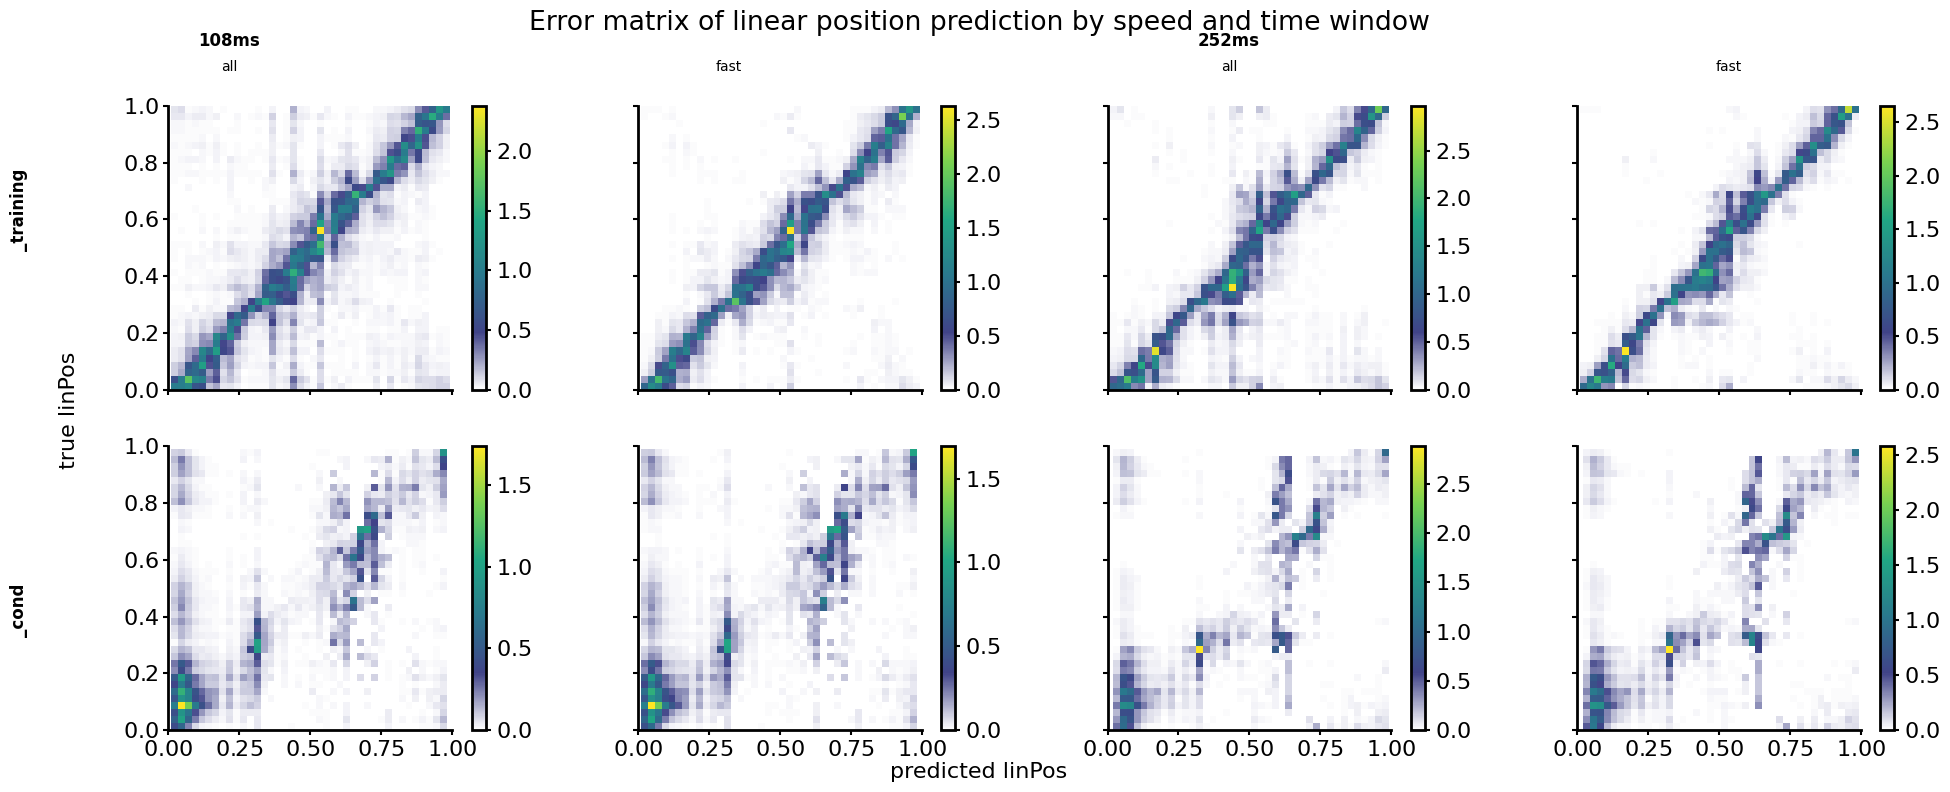

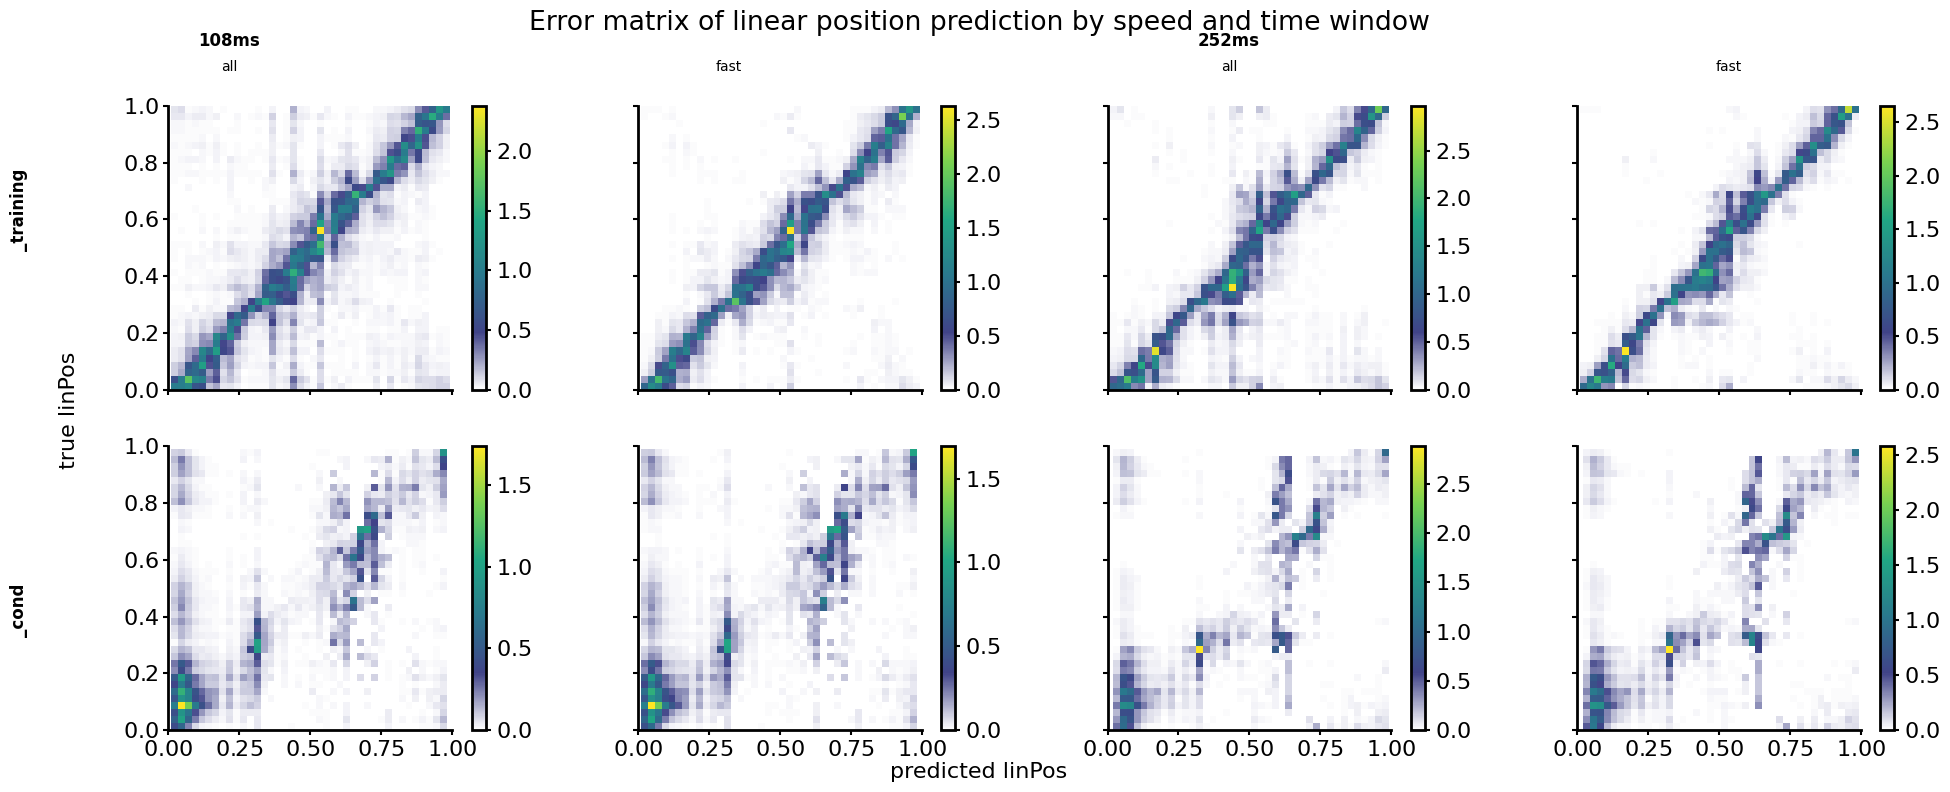

In [54]:
loader_all.results_dict["current_LogLoss_Transformer_Dense_LSTM"]["M1239MFB"][
    "cond"
].error_matrix_linerrors_by_speed()

## save dataframe as mat struct

In [56]:
from scipy.io import savemat

# Save the DataFrame as a .mat file

mdict = dict()
df = loader_all.results_df.copy()
for col in df.drop(columns=["results"]).columns:
    mdict[col] = df[col].to_numpy()

# Save the dictionary as a .mat file
savemat(os.path.join(main_dir, "..", "resultsNN_withColumns.mat"), mdict)

/home/mickey/Documents/Theotime/neuroEncoders/.venv/lib/python3.10/site-packages/scipy/io/matlab/_mio5.py:495: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  narr = np.asanyarray(source)


## save dataframe as csv file

In [57]:
loader_all.results_df.drop(columns=["results"]).to_csv(
    os.path.join(main_dir, "..", "dataFrame.csv"), index=False
)

## analysis

In [58]:
import seaborn as sns

In [59]:
import plotly.express as px

px.scatter_matrix(
    loader_all.results_df[
        (loader_all.results_df.ann_mode == "Transformer")
        & (loader_all.results_df.phase == "pre")
        & (loader_all.results_df.winMS == 252)
    ],
    dimensions=[
        "training_asymmetry_index",
        "asymmetry_index_on_predicted",
        "mean_error",
        "predicted_asymmetry_ratio",
        "predicted_asymmetry_ratio_normalized",
    ],
    color="mouse",
    symbol="phase",
    title="Asymmetry Analysis for Transformer Model",
    width=1500,
    height=1500,
)

<AxesSubplot: >

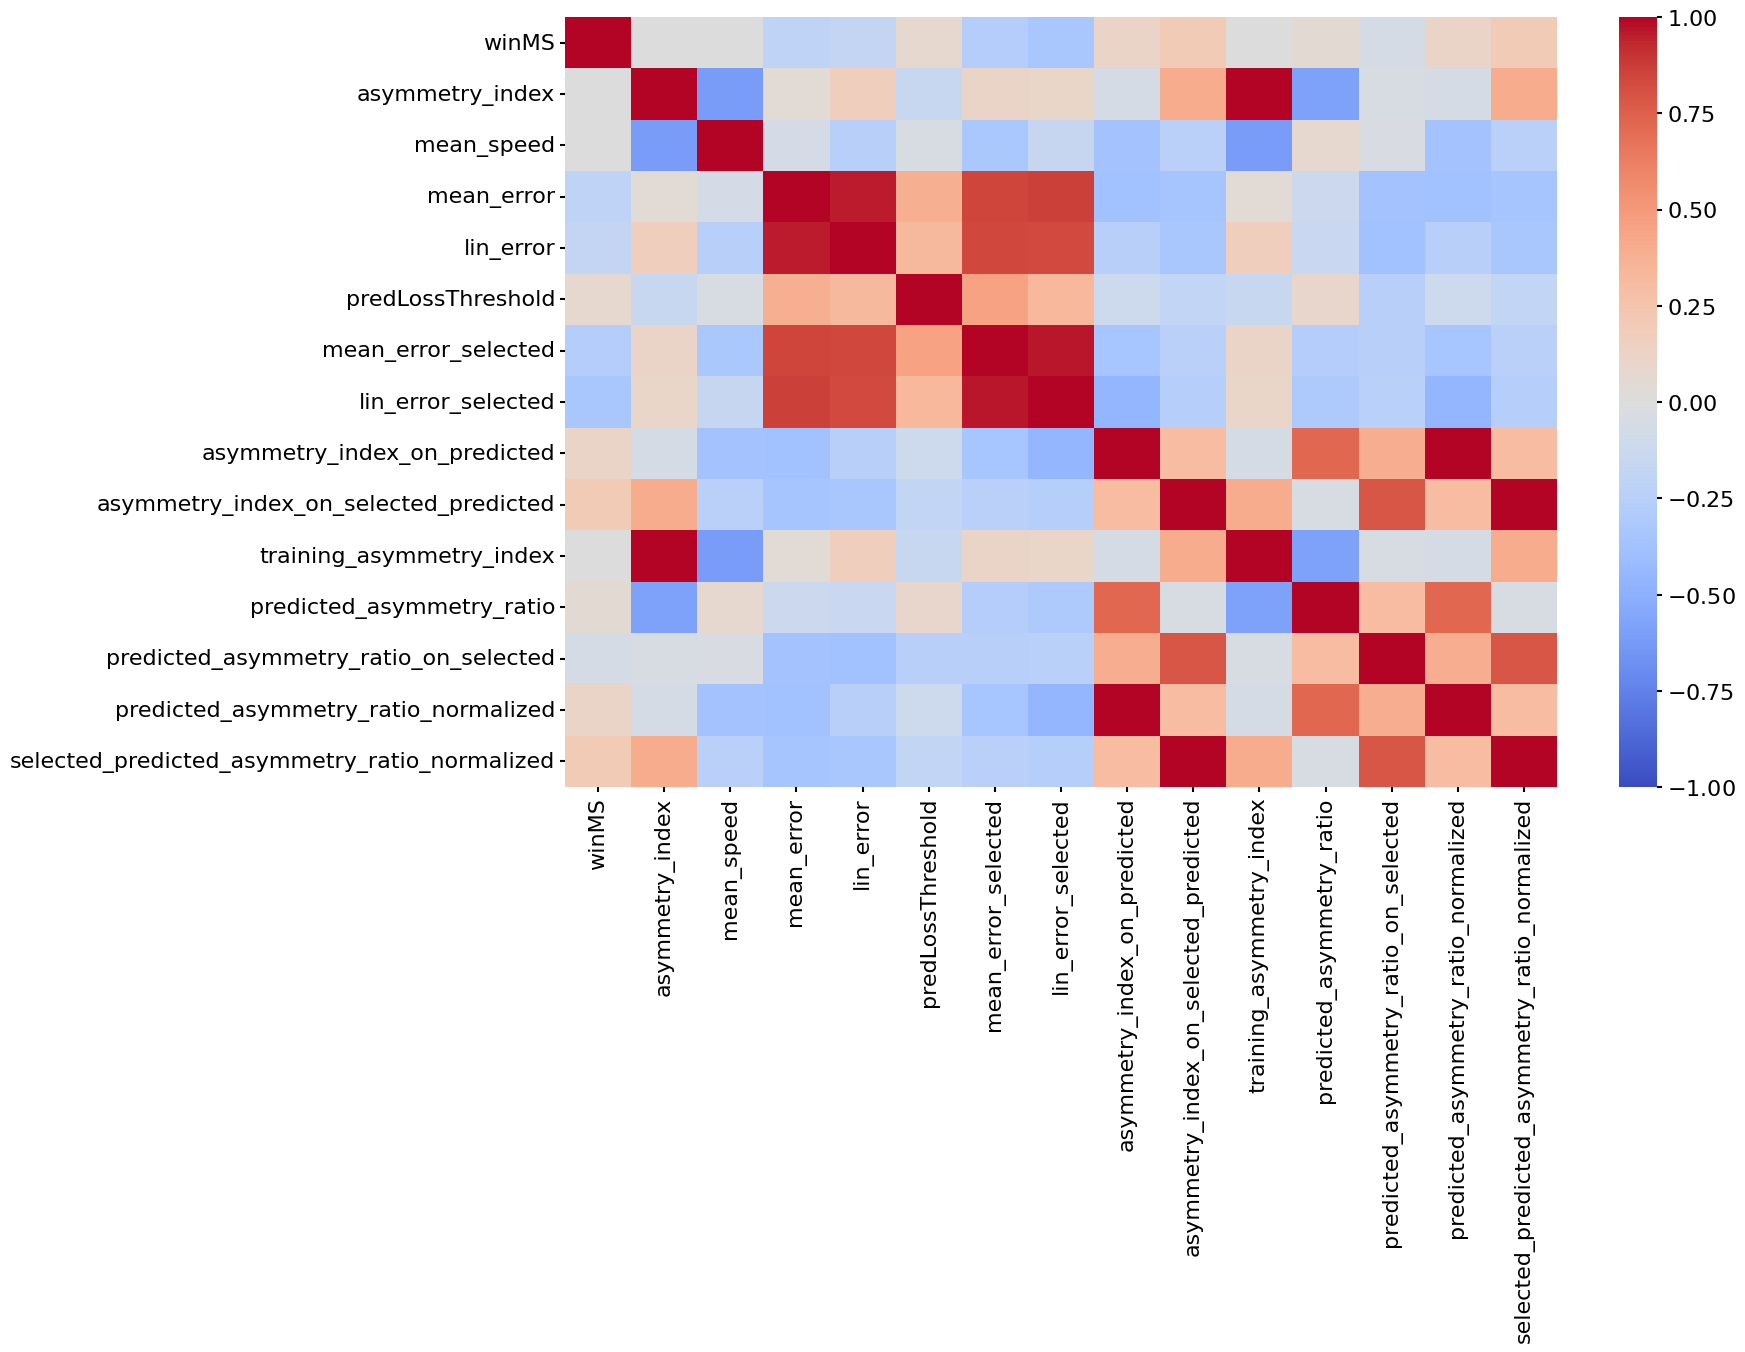

In [142]:
from matplotlib.colors import Normalize

corr = (
    loader_all.results_df.query("phase == 'pre'")
    .drop(columns="real_asymmetry_ratio")
    .corr(numeric_only=True)
)
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="coolwarm",
    norm=Normalize(vmin=-1, vmax=1),
)

In [129]:
import plotly.express as px

px.scatter_matrix(
    loader_all.results_df[
        (loader_all.results_df.ann_mode == "Transformer")
        & (loader_all.results_df.phase == "pre")
        & (loader_all.results_df.winMS == 252)
        & (loader_all.results_df.mouse != "M1230Known")
    ],
    dimensions=[
        "training_asymmetry_index",
        "asymmetry_index_on_predicted",
        "mean_error",
        "predicted_asymmetry_ratio",
        "predicted_asymmetry_ratio_normalized",
    ],
    color="mouse",
    symbol="phase",
    title="Asymmetry Analysis for Transformer Model",
    width=1500,
    height=1500,
)

In [62]:
mice_names

['1199', '994', '1239', '1230', '1230', '1162']

In [61]:
loader_all.results_df.query(
    "ann_mode == 'Transformer' & phase != 'cond'"
).mouse.unique()

array(['M1162MFB', 'M1199PAG', 'M1230Known', 'M1230Novel', 'M1239MFB',
       'M994PAG'], dtype=object)

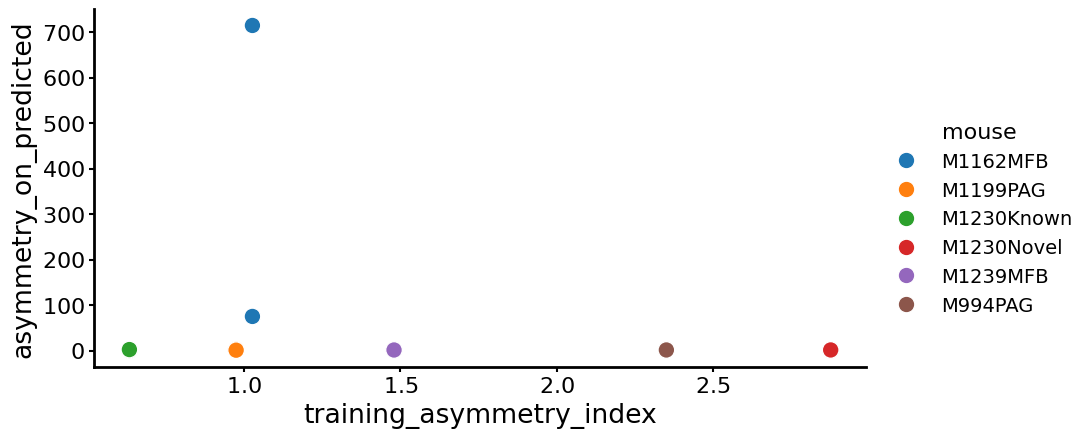

In [64]:
# plot a correlation plot between asymmetry_inded and mean_error, lin_error. hue by ann_mode and phase
sns.pairplot(
    loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'"),
    x_vars=["training_asymmetry_index"],
    y_vars=["asymmetry_on_predicted"],
    hue="mouse",
    height=4.5,
    aspect=2,
)

In [74]:
loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'")[
    ["mouse", "winMS"]
].apply(tuple, axis=1)

2       (M1162MFB, 108)
3       (M1162MFB, 252)
8       (M1199PAG, 108)
9       (M1199PAG, 252)
14    (M1230Known, 108)
15    (M1230Known, 252)
20    (M1230Novel, 108)
21    (M1230Novel, 252)
26      (M1239MFB, 108)
27      (M1239MFB, 252)
32       (M994PAG, 108)
33       (M994PAG, 252)
dtype: object

In [102]:
loader_all.results_df.asymmetry_bias

36    14.574086
37     4.604777
38    21.738744
39     6.677285
40    14.574086
        ...    
31     0.221105
32     0.913019
33     0.566472
34     1.026420
35     0.607129
Name: asymmetry_bias, Length: 72, dtype: float64

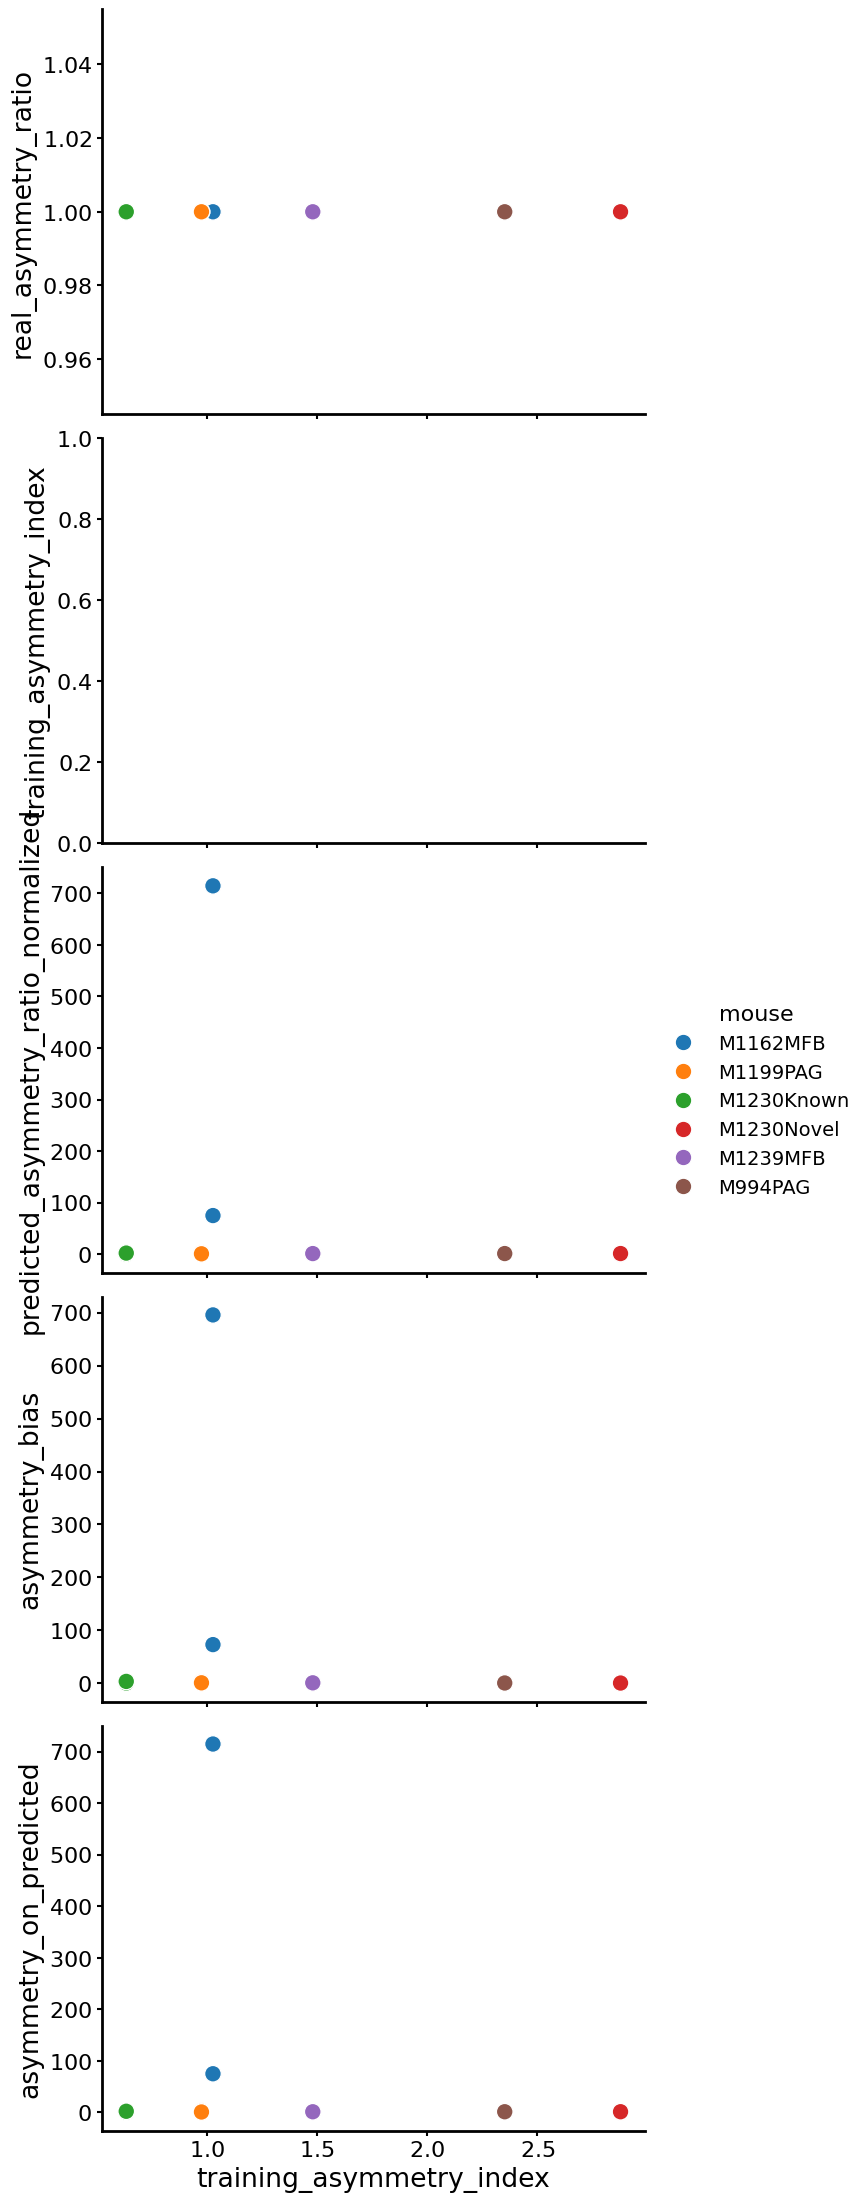

In [97]:
sns.pairplot(
    loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'")[
        [
            "mouse",
            "real_asymmetry_ratio",
            "training_asymmetry_index",
            "predicted_asymmetry_ratio_normalized",
            "asymmetry_bias",
            "asymmetry_on_predicted",
        ]
    ],
    x_vars=["training_asymmetry_index"],
    hue="mouse",
    height=4.5,
    aspect=1.5,
)

In [87]:
sns.pairplot(
    loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'")[
        loader_all.results_df.columns[
            loader_all.results_df.columns.str.contains("asymmetry|error|mouse")
        ]
    ],
    hue="mouse",
    height=4.5,
    aspect=1.5,
)

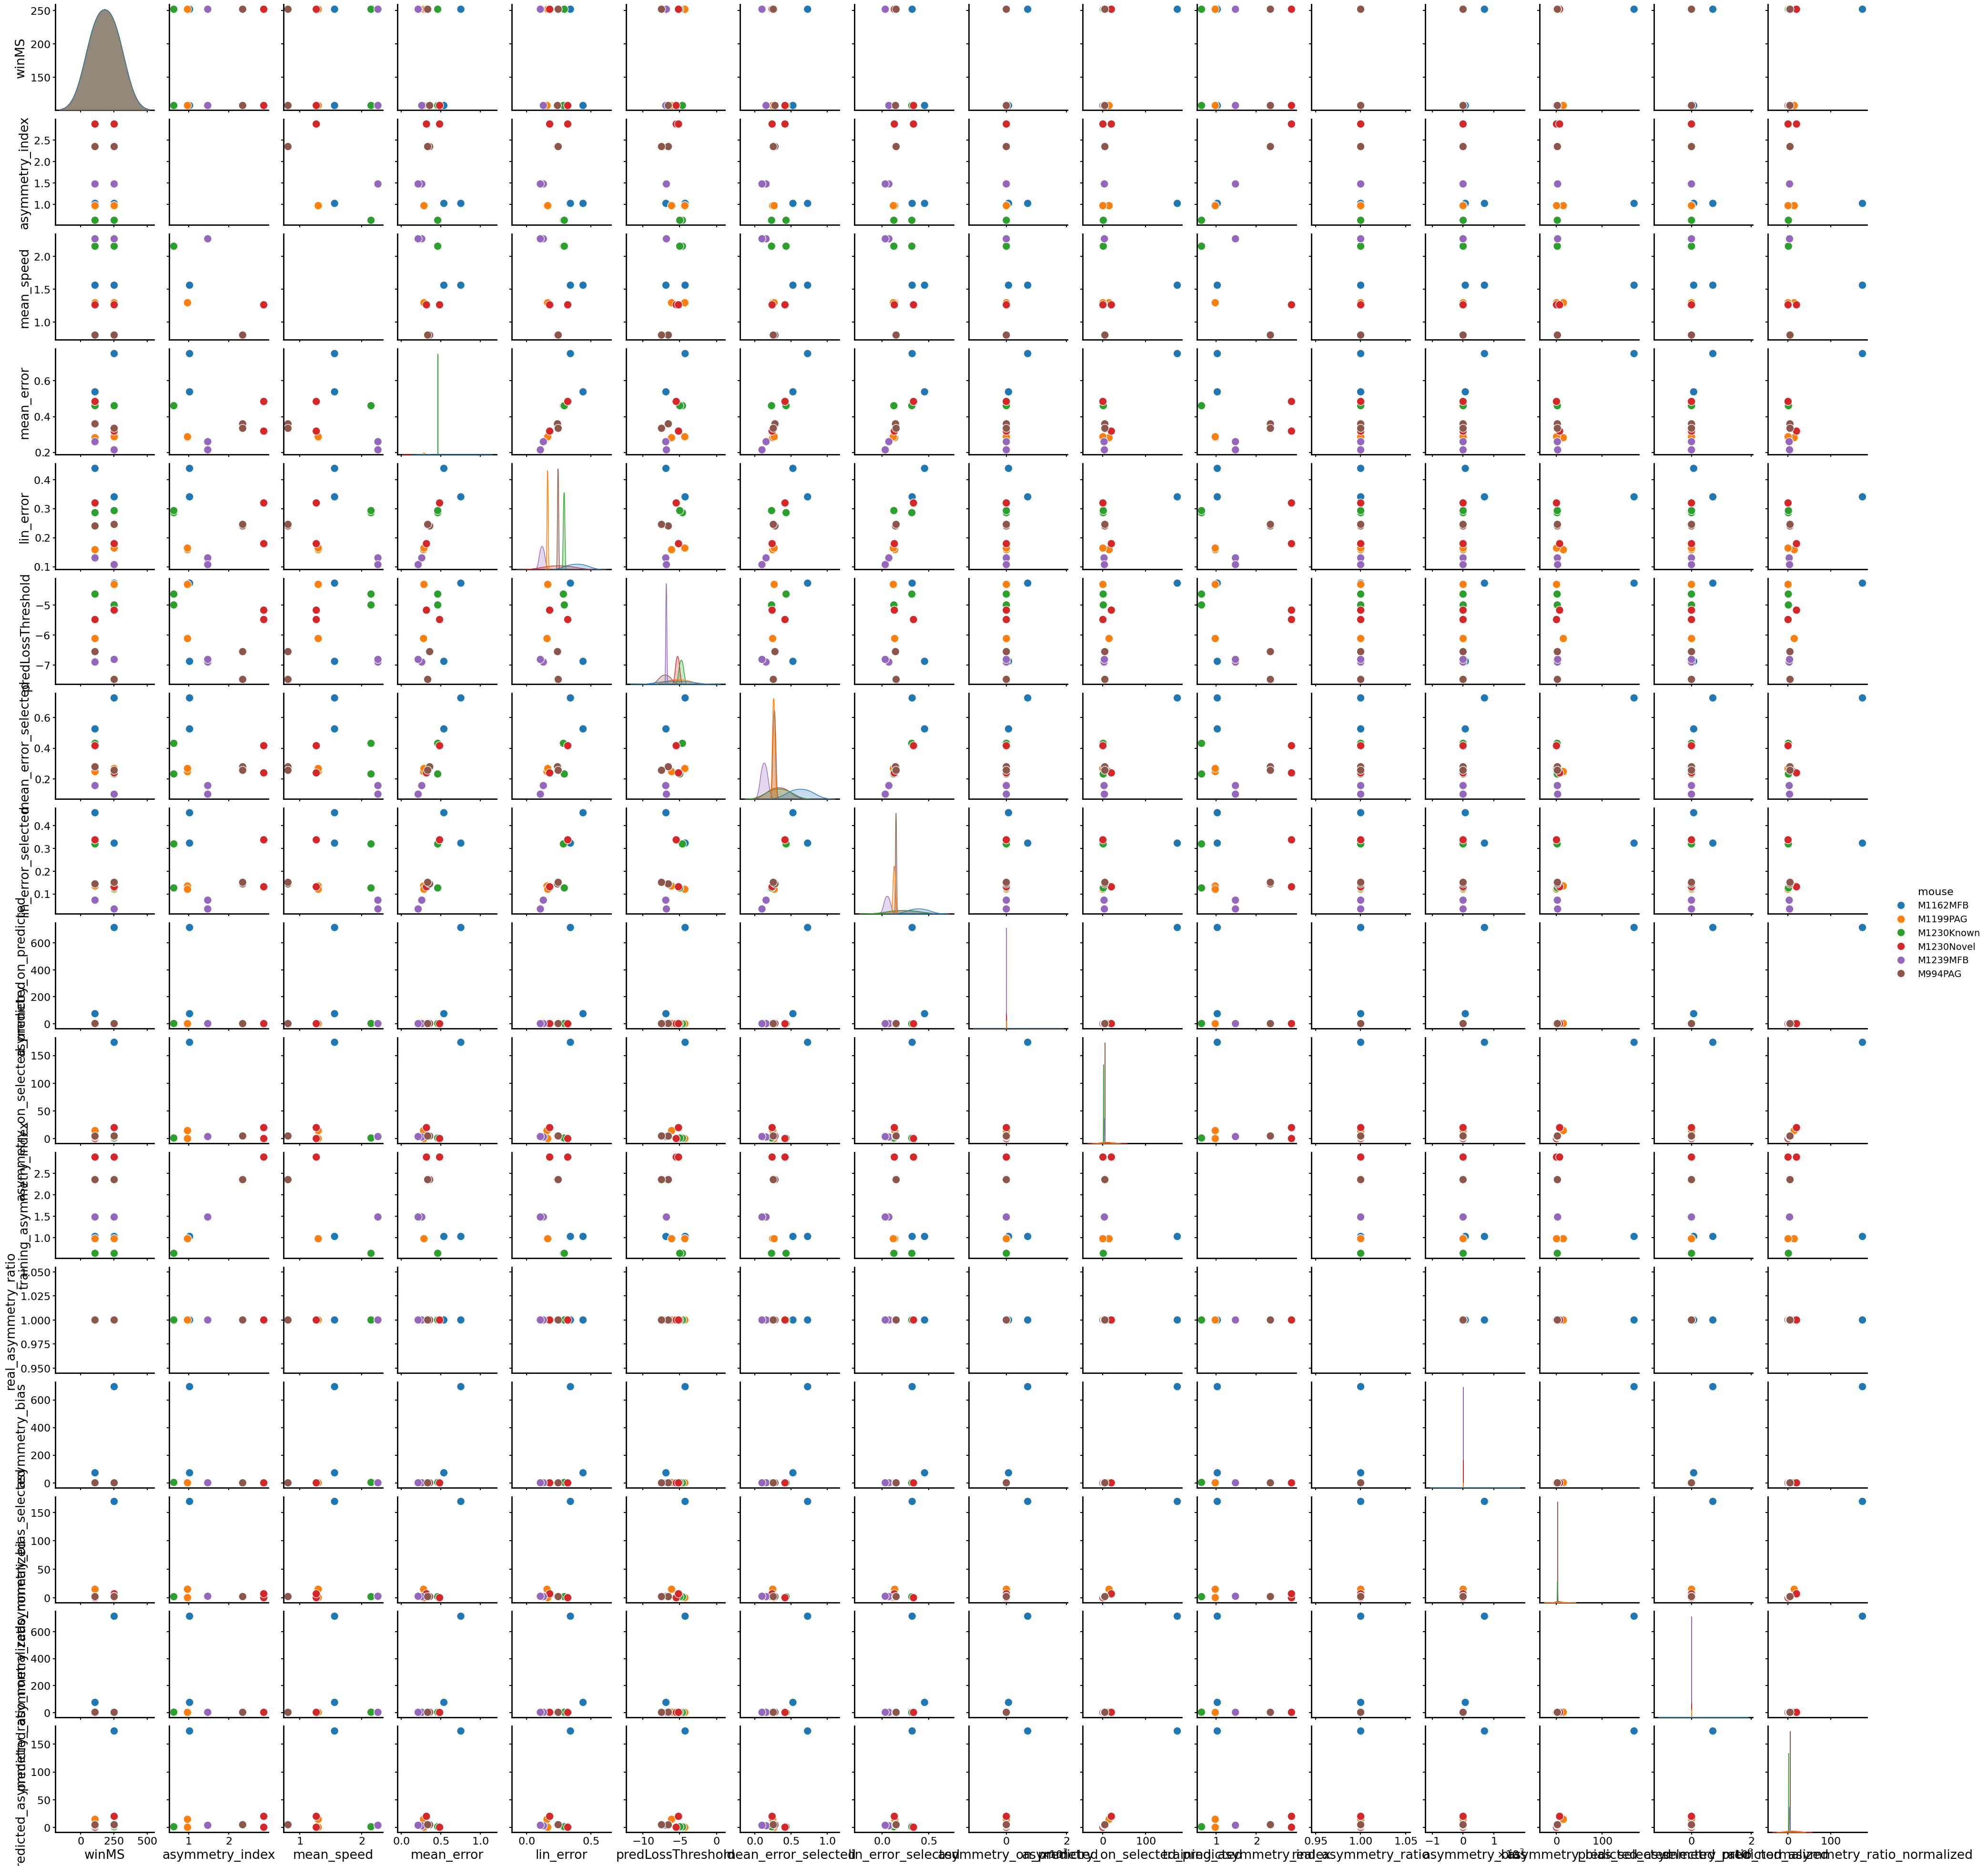

In [75]:
sns.pairplot(
    loader_all.results_df.query("ann_mode == 'Transformer' & phase == 'pre'"),
    hue="mouse",
)

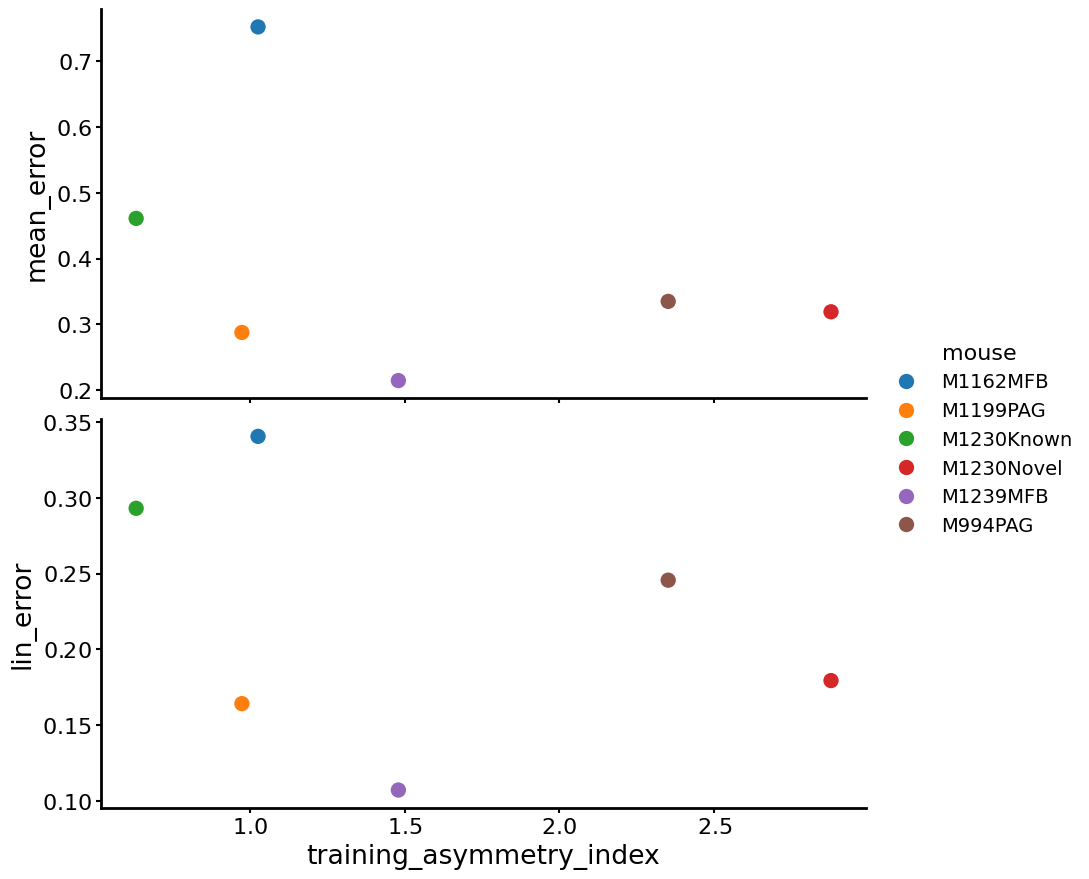

In [79]:
# plot a correlation plot between asymmetry_inded and mean_error, lin_error. hue by ann_mode and phase
from turtle import title


sns.pairplot(
    loader_all.results_df.query(
        "ann_mode == 'Transformer' & phase == 'pre' & winMS == 252"
    ),
    x_vars=["training_asymmetry_index"],
    y_vars=["mean_error", "lin_error"],
    hue="mouse",
    height=4.5,
    aspect=2,
)

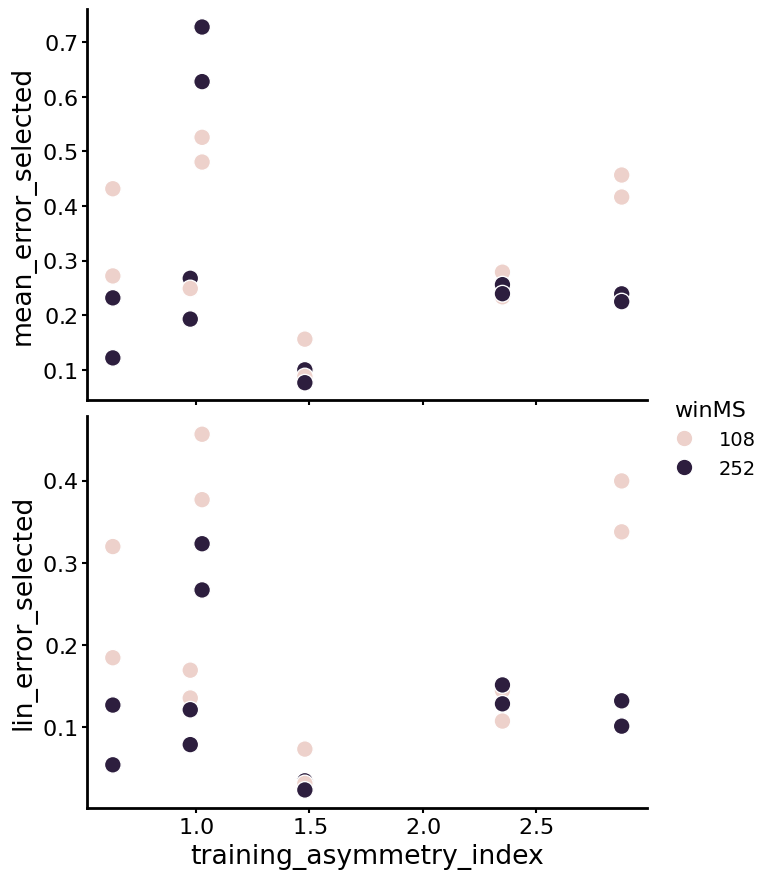

In [81]:
# plot a correlation plot between asymmetry_inded and mean_error, lin_error. hue by ann_mode and phase.
sns.pairplot(
    loader_all.results_df[
        (loader_all.results_df.ann_mode == "Transformer")
        & (loader_all.results_df.phase != "cond")
    ],
    x_vars=["training_asymmetry_index"],
    y_vars=["mean_error_selected", "lin_error_selected"],
    hue="winMS",
    height=4.5,
    aspect=1.5,
)

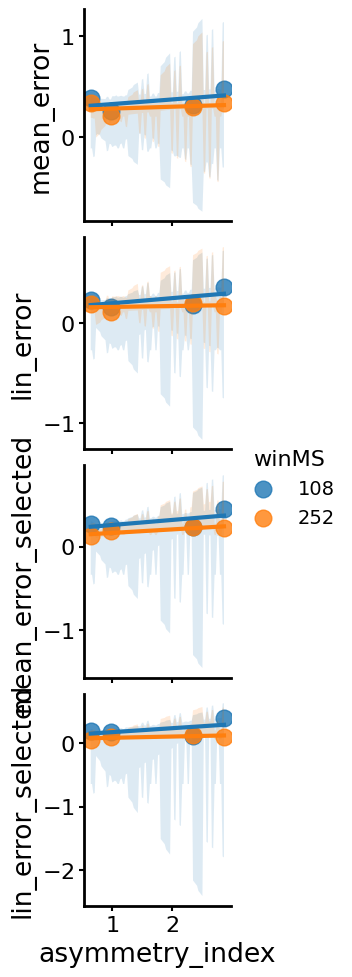

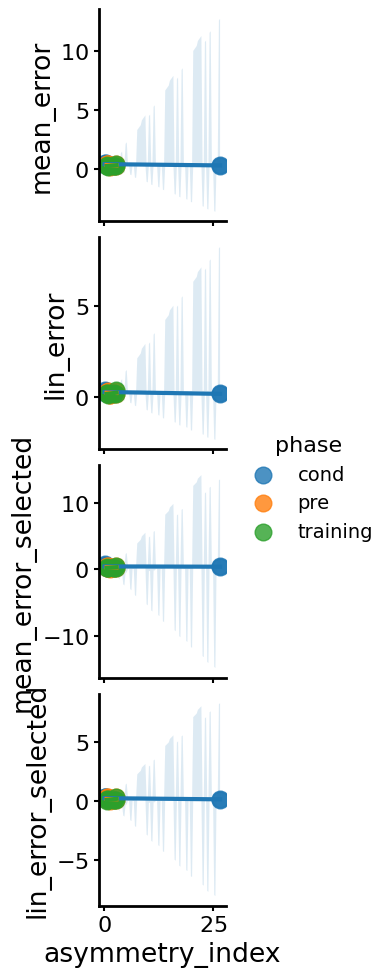

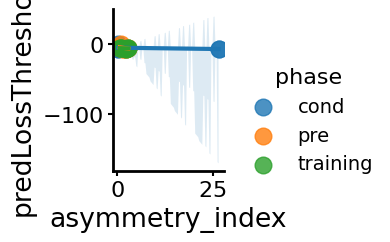

In [285]:
import seaborn as sns

# plot a correlation plot between asymmetry_inded and mean_error, lin_error. hue by ann_mode and phase.
sns.pairplot(
    df[(df.ann_mode == "Transformer") & (df.phase == "training")],
    x_vars=["asymmetry_index"],
    y_vars=["mean_error", "lin_error", "mean_error_selected", "lin_error_selected"],
    hue="winMS",
    kind="reg",
    diag_kind="kde",
)
sns.pairplot(
    df[(df.ann_mode == "Transformer")],
    x_vars=["asymmetry_index"],
    y_vars=["mean_error", "lin_error", "mean_error_selected", "lin_error_selected"],
    hue="phase",
    kind="reg",
    diag_kind="kde",
)
sns.pairplot(
    df[(df.ann_mode == "Transformer")],
    x_vars=["asymmetry_index"],
    y_vars=["predLossThreshold"],
    hue="phase",
    kind="reg",
    diag_kind="kde",
)

In [ ]:
from importData.gui_elements import AnimatedPositionPlotter

In [ ]:
%matplotlib qt

In [ ]:
plt.close("all")

In [ ]:
results_dict["Transformer"]["1199PAG"]["pre"].render_frame_static(
    frame=40,
    pair_points=True,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    blit=True,
)

In [ ]:
results_dict["Transformer"]["1199PAG"]["pre"].save_video_frame_with_pool(
    output_dir="/home/mickey/download/bonjourPool",
    pair_points=True,
    interval=70,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    blit=True,
)

results_dict["Transformer"]["1199PAG"]["pre"].save_video_frame_with_joblib(
    output_dir="/home/mickey/download/bonjourLib",
    pair_points=True,
    interval=70,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    blit=True,
)

In [ ]:
results_dict["Transformer"]["1199PAG"]["pre"].show_movie(
    blit=True,
    pair_points=True,
    interval=200,
    l_function=Mouse_Results.l_function,
    linear_position_mode=True,
    alpha_delta_line=0.75,
    be_fast=False,
)

In [ ]:
for ann_mode, dir, name_exp in zip(
    ["Transformer", "LSTM"],
    [Dir_Transformer, Dir_LSTM],
    [nameExp_Transformer, nameExp_LSTM],
):
    for mouse, manipe in zip(mice_names, mice_manipes):
        for suffix, phase in zip(
            ["_pre", "_training", "_cond"], ["pre", "training", "cond"]
        ):
            skip_to_next_suffix = False
            print(f"Processing mouse {mouse} with manip {manipe}")
            try:
                Mouse_Results = results_dict[ann_mode][mouse + manipe][phase]
            except KeyError:
                print(
                    f"KeyError for mouse {mouse} with manipulation {manipe} in phase {phase}"
                )
                skip_to_next_suffix = True
                continue

            if skip_to_next_suffix:
                continue
            # results_dict[ann_mode][mouse].error_matrix_linerrors_by_speed(suffixes = ["_pre", "_training", "_cond"])
            # Mouse_Results.predLoss_linError()

            for i, winms in enumerate(Mouse_Results.windows):
                skip_to_next_win = False
                idx = Mouse_Results.windows.index(winms)
                win_value = Mouse_Results.windows_values[idx]
                try:
                    quantile_predLoss = np.quantile(
                        Mouse_Results.resultsNN_phase[suffix]["predLoss"][idx], 0.3
                    )
                    selection = (
                        Mouse_Results.resultsNN_phase[suffix]["predLoss"][idx]
                        < quantile_predLoss
                    )
                except KeyError:
                    print(
                        f"KeyError for quantile_predLoss in mouse {mouse}, manipulation {manipe}, phase {phase}"
                    )
                    skip_to_next_win = True
                    continue

                if skip_to_next_win:
                    continue

                plotter_vanilla = AnimatedPositionPlotter(
                    Mouse_Results.data_helper[winms],
                    positions=Mouse_Results.resultsNN_phase[suffix]["truePos"][idx],
                    predicted=Mouse_Results.resultsNN_phase[suffix]["fullPred"][idx],
                    windowSizeMS=win_value,
                    fps=30,
                    target=target,
                    mouse_name=mouse,
                    manipe=manipe,
                    nameExp=name_exp,
                    interval=70,
                    pair_points=True,
                    l_function=Mouse_Results.l_function,
                    linear_position_mode=True,
                    blit=True,
                    setup_plot=True,
                    block=False,
                )

                plotter_vanilla.show()
                plotter = AnimatedPositionPlotter(
                    Mouse_Results.data_helper[winms],
                    positions=Mouse_Results.resultsNN_phase[suffix]["truePos"][idx],
                    predicted=Mouse_Results.resultsNN_phase[suffix]["fullPred"][idx],
                    predLossMask=selection,
                    windowSizeMS=win_value,
                    fps=30,
                    target=target,
                    mouse_name=mouse,
                    manipe=manipe,
                    nameExp=name_exp,
                    interval=70,
                    pair_points=True,
                    l_function=Mouse_Results.l_function,
                    linear_position_mode=True,
                    blit=True,
                    setup_plot=True,
                    block=False,
                )

                if not os.path.exists(os.path.join(main_dir, ann_mode, mouse + manipe)):
                    print(f"Creating directory: {os.path.join(main_dir, ann_mode)}")
                    os.mkdir(os.path.join(main_dir, ann_mode))
                if not os.path.exists(os.path.join(main_dir, ann_mode, mouse + manipe)):
                    print(
                        f"Creating directory: {os.path.join(main_dir, ann_mode, mouse + manipe)}"
                    )
                    os.mkdir(os.path.join(main_dir, ann_mode, mouse + manipe))

                if not os.path.exists(
                    os.path.join(
                        main_dir,
                        ann_mode,
                        mouse + manipe,
                        f"{mouse}_{manipe}_phase_{phase}_win_{win_value}.mp4",
                    )
                ):
                    try:
                        animation_tmp_vanilla = plotter_vanilla.create_animation(
                            repeat=False,
                            save_path=os.path.join(
                                main_dir,
                                ann_mode,
                                mouse + manipe,
                                f"{mouse}_{manipe}_phase_{phase}_win_{win_value}.mp4",
                            ),
                        )
                    except KeyError:
                        continue

                if not os.path.exists(
                    os.path.join(
                        main_dir,
                        ann_mode,
                        mouse + manipe,
                        f"filtered_{mouse}_{manipe}_phase_{phase}_win_{win_value}.mp4",
                    )
                ):
                    print(
                        f"Creating animation for filtered data: {mouse}_{manipe}_phase_{phase}"
                    )
                    try:
                        animation_tmp = plotter.create_animation(
                            repeat=False,
                            save_path=os.path.join(
                                main_dir,
                                ann_mode,
                                mouse + manipe,
                                f"filtered_{mouse}_{manipe}_phase_{phase}_win_{win_value}.mp4",
                            ),
                        )
                    except KeyError:
                        print(
                            f"KeyError for filtered animation: {mouse}_{manipe}_win_{win_value}_phase_{phase}"
                        )
                        continue

print("All animations created successfully.")

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.load_results(force=True)

In [ ]:
Mouse_Results.load_results(force=True, phase="training", which="bayes")

In [ ]:
Mouse_Results.load_results(force=True, phase="cond")

In [ ]:
Mouse_Results.data_helper["108"].phase

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.resultsNN.keys()

In [ ]:
inferring = Mouse_Results.resultsNN["fullPred"][1]
linferring = Mouse_Results.resultsNN["linPred"][0]
pos = Mouse_Results.resultsNN["truePos"][1]
lpos = Mouse_Results.resultsNN["linTruePos"][0]

error = np.array(
    [np.linalg.norm(inferring[i, :] - pos[i, :]) for i in range(inferring.shape[0])]
)  # eucledian distance

In [ ]:
error_mask = error > 0.6

In [ ]:
linferring.min()

In [ ]:
plt.hist2d(
    lpos,
    linferring,
    cmap="viridis",
    bins=[np.linspace(0, 1, 50), np.linspace(0, 1, 50)],
)

In [ ]:
plt.hist2d(inferring[error_mask, 0], inferring[error_mask, 1], cmap="viridis")
plt.colorbar()

In [ ]:
np.where(
    np.linalg.norm(
        [Mouse_Results.resultsNN["fullPred"][0], Mouse_Results.resultsNN["truePos"][0]]
    )
    > 0
)[0]

In [ ]:
Mouse_Results.resultsNN.keys()

In [ ]:
Mouse_Results.show_results(phase="training", save=True)

In [ ]:
from importData.gui_elements import AnimatedPositionPlotter

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.resultsNN

In [ ]:
plotter = AnimatedPositionPlotter(
    Mouse_Results.data_helper["108"],
    positions=Mouse_Results.resultsNN["truePos"][0],
    predicted=Mouse_Results.resultsNN["fullPred"][0],
    speedMaskArray=Mouse_Results.resultsNN["speedMask"][0],
    windowSizeMS=108,
    fps=30,
    target=target,
    mouse_name=mouse,
    manipe=manipe,
    nameExp=nameExp,
)

anim = plotter.show(interval=10, repeat=True, block=True, with_ref_bg=False)

In [ ]:
Mouse_Results.data_helper["108"]

In [ ]:
Mouse_Results.ann["108"].fix_linearizer(
    Mouse_Results.Linearizer.mazePoints, Mouse_Results.Linearizer.tsProj
)

In [ ]:
Mouse_Results.ann["108"].setup_dynamic_dense_loss(
    Mouse_Results.data_helper["108"].fullBehavior, alpha=1
)

In [ ]:
%matplotlib qt

In [ ]:
print_results.print_results(
    Mouse_Results.ann["108"].folderResult,
    windowSizeMS=108,
    show=True,
    lossSelection=0.1,
    euclidean=False,
    target="pos",
    phase=None,
    training_data=Mouse_Results.ann["108"].training_data,
    save=False,
    l_function=Mouse_Results.l_function,
)

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib qt

In [ ]:
from importData.epochs_management import inEpochsMask

trainMask = inEpochsMask(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][:, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["trainEpochs"],
)
testMask = inEpochsMask(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][:, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["testEpochs"],
)
speedMask = Mouse_Results.data_helper["108"].fullBehavior["Times"]["speedFilter"]

mask = (trainMask | testMask) * speedMask

In [ ]:
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][:, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][:, 0],
    "o",
    markersize=1,
    alpha=0.5,
    c="r",
)
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][trainMask, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][trainMask, 0],
    "o",
    markersize=1,
    alpha=1,
)
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][trainMask, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][trainMask, 1],
    "o",
    markersize=1,
    alpha=1,
)

In [ ]:
training_data = Mouse_Results.data_helper["108"].fullBehavior["Positions"][mask]
training_data.shape

In [ ]:
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][:, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][:, 0],
    "o",
    markersize=1,
    alpha=0.3,
    c="r",
)
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][mask, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][mask, 0],
    "o",
    markersize=1,
    alpha=1,
)
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][mask, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][mask, 1],
    "o",
    markersize=1,
    alpha=1,
)

In [ ]:
Mouse_Results.show_results(
    save=False,
    winMS=108,
    phase="training",
    training_data=training_data,
    lossSelection=0.1,
    l_function=Mouse_Results.l_function,
)

In [ ]:
Mouse_Results.load_data(suffix="_pre")

In [ ]:
Mouse_Results.resultsNN

In [ ]:
Mouse_Results.test_bayes()

In [ ]:
Mouse_Results.fig_example_XY(108)

In [ ]:
Mouse_Results.fig_example_linear_filtered(fprop=0.1)

In [ ]:
Mouse_Results.compare_nn_bayes(108, isShow=True)

In [ ]:
Mouse_Results.mean_euclerrors()

In [ ]:
Mouse_Results.predLoss_vs_trueLoss()

In [ ]:
Mouse_Results.nnVSbayes()

In [ ]:
Mouse_Results.mean_linerrors()

In [ ]:
Mouse_Results.predLoss_linError(speed="slow", step=1e-6)

In [ ]:
Mouse_Results.predLoss_euclError(step=1e-6, scaled=False)

In [ ]:
Mouse_Results.fig_example_2d(speed="fast")

In [ ]:
Mouse_Results.hist_linerrors(speed="fast")

In [ ]:
Mouse_Results.Params.phase

In [ ]:
Mouse_Results.run_spike_alignment(useTrain=False)

In [ ]:
Mouse_Results.plot_pc_tuning_curve_and_predictions(ws=108)

In [ ]:
%matplotlib qt

In [ ]:
Mouse_Results.DataHelper.fullBehavior["positionTime"]

In [ ]:
Mouse_Results.load_results(force=True, phase="pre")

In [ ]:
from importData.epochs_management import inEpochs


fig, ax = plt.subplots()

ax1 = plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)

trainMask = inEpochs(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"],
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["trainEpochs"],
)[0]
testMask = inEpochs(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"],
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["testEpochs"],
)[0]

ax1.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][trainMask],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][trainMask, 0],
    "--.",
    color="black",
    label="training",
    markersize=6,
)
ax1.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][testMask],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][testMask, 0],
    "--.",
    color="red",
    label="testing",
    markersize=6,
)

ax2.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][trainMask],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][trainMask, 1],
    "--.",
    color="black",
    label="training",
    markersize=6,
)
ax2.plot(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"][testMask],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][testMask, 1],
    "--.",
    color="red",
    label="testing",
    markersize=6,
)

In [ ]:
print_results.print_results(
    Mouse_Results.folderResult, show=True, windowSizeMS=108, phase=phase, target=target
)

In [ ]:
Mouse_Results.data_helper["108"].fullBehavior["Times"]["SessionEpochs"]["pre"]

In [ ]:
plt.plot(np.arange(0, 1000, 1), np.random.rand(1000), label="test")

In [ ]:
plt.plot(testEpochs[0])
plt.show()

In [ ]:
from importData.epochs_management import inEpochs

testEpochs = inEpochs(
    Mouse_Results.data_helper["108"].fullBehavior["positionTime"].flatten(),
    Mouse_Results.data_helper["108"].fullBehavior["Times"]["testEpochs"],
)[0]
plt.plot(
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][testEpochs, 0],
    Mouse_Results.data_helper["108"].fullBehavior["Positions"][testEpochs, 1],
)
plt.show()

In [ ]:
Mouse_Results.projects["108"]

In [ ]:
print(Mouse_Results.projects["108"])

In [ ]:
Mouse_Results.load_trainers()

In [ ]:
Mouse_Results.load_results(force=True)

In [ ]:
%matplotlib inline

In [ ]:
NNTrainer = Training.LSTMandSpikeNetwork(
    ProjectPath,
    Parameters[winMS],
    deviceName=deviceName,
    debug=False,
    phase=phase,
)

In [ ]:
DataHelper.resultsPath

In [ ]:
featurePred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"featurePred_{phase}.csv")
).to_numpy()
featureTrue = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"featureTrue_{phase}.csv")
).to_numpy()
lossPred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"lossPred_{phase}.csv")
).to_numpy()
speedMask = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"speedMask_{phase}.csv")
).to_numpy()

linearPred = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"linearPred_{phase}.csv")
).to_numpy()
linearTrue = pd.read_csv(
    os.path.join(DataHelper.resultsPath, f"linearTrue_{phase}.csv")
).to_numpy()

In [ ]:
featurePred = featurePred[:, -2]
featureTrue = featureTrue[:, -2]
lossPred = lossPred[:, -1]
speedMask = speedMask[:, -1]

In [ ]:
DataHelper.fullBehavior["Times"]["testEpochs"]

In [ ]:
from importData.epochs_management import inEpochs, inEpochsMask

timeStepPred = DataHelper.fullBehavior["positionTime"][
    inEpochs(
        DataHelper.fullBehavior["positionTime"][:, 0],
        DataHelper.fullBehavior["Times"]["testEpochs"],
    )
]

NameError: name 'DataHelper' is not defined

In [ ]:
timeStepPred

In [ ]:
plt.plot(featureTrue)

In [ ]:
qControltmp = lossPred.copy()
temp = lossPred.argsort(axis=0)

In [ ]:
thresh = np.squeeze(qControltmp[temp[int(len(temp) * 0.5)]])

In [ ]:
np.quantile(lossPred, 0.5)

In [ ]:
selection = np.squeeze(qControltmp < thresh)

In [ ]:
inferring = featurePred
pos = featureTrue

In [ ]:
selection

In [ ]:
temp

In [ ]:
%matplotlib inline

In [ ]:
lossPred

In [ ]:
plt.hist(featureTrue, label="True Feature")
plt.hist(featurePred, label="Predicted Feature")
plt.legend()

In [ ]:
for quantile in [0.1, 0.2, 0.3, 0.4, 0.5]:
    qControl = np.quantile(lossPred, quantile)
    plt.figure()
    plt.title(f"Quantile {quantile}")
    plt.plot(
        featurePred[lossPred <= qControl],
        np.abs(featureTrue[lossPred <= qControl] - featurePred[lossPred <= qControl]),
        "k.",
    )
    mean_error = np.mean(
        np.abs(featureTrue[lossPred <= qControl] - featurePred[lossPred <= qControl])
    )
    plt.axhline(
        mean_error, color="r", linestyle="--", label=f"Mean Error: {mean_error:.2f}"
    )
    plt.xlabel("Predicted Feature")

In [ ]:
DataHelper.globalResultsPath

In [ ]:
reload(print_results)
print_results.print_results(
    NNTrainer.folderResult,
    windowSizeMS=108,
    lossSelection=0.5,
    target="pos",
    phase=phase,
)

## waveform comparator

In [ ]:
from importData.compareSpikeFiltering import WaveFormComparator

In [ ]:
Mouse_Results.run_spike_alignment(force=True)

In [ ]:
waveform = WaveFormComparator(
    Mouse_Results.Project,
    Mouse_Results.Params,
    Mouse_Results.DataHelper.fullBehavior,
    windowSizeMS=Mouse_Results.windowSizeMS,
    useTrain=True,
)

In [ ]:
waveform.save_alignment_tools(
    Mouse_Results.bayes,
    Mouse_Results.l_function,
    windowSizeMS=Mouse_Results.windowSizeMS,
)

## temp

In [ ]:
projectPath = Project(
    os.path.join(
        Dir[
            (Dir["name"].str.contains(mouse)) & (Dir["manipe"].str.contains(manipe))
        ].path.values[0],
        "amplifier.xml",
    ),
    nameExp=nameExp,
    windowSize=0.108,
)

In [ ]:
projectPath.experimentPath

In [ ]:
windowSizeMS

In [ ]:
DataHelper = DataHelperClass(
    projectPath.xml,
    windowSize=0.108,
    mode=mode,
    target=target,
    phase=phase,
    nameExp=nameExp,
)

In [ ]:
DataHelper.folderResult

In [ ]:
Linearizer = UMazeLinearizer(projectPath.folder, phase=phase)

In [ ]:
%matplotlib qt

In [ ]:
Linearizer.verify_linearization(
    DataHelper.positions / DataHelper.maxPos(), projectPath.folder, overwrite=False
)

In [ ]:
l_function = Linearizer.pykeops_linearization

In [ ]:
DataHelper.get_true_target(l_function, in_place=True, show=True)

In [ ]:
windowSizeMS

In [ ]:
Parameters = Params(
    helper=DataHelper,
    windowSize=0.108,
    nEpochs=nEpochs,
    phase=phase,
    batchSize=256,
    save_json=True,
)

In [ ]:
Parameters.folderResult

In [ ]:
Parameters.resultsPath

In [ ]:
save_project_to_pickle(projectPath)

In [ ]:
save_project_to_pickle(
    Parameters, output=os.path.join(Parameters.resultsPath, "Parameters.pkl")
)